In [6]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df =  pd.read_csv('./datasets/Churn_Modelling.csv')

df.shape, df.columns, df.head()

((10000, 14),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object'),
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
 0          1    15634602  Hargrave          619    France  Female   42   
 1          2    15647311      Hill          608     Spain  Female   41   
 2          3    15619304      Onio          502    France  Female   42   
 3          4    15701354      Boni          699    France  Female   39   
 4          5    15737888  Mitchell          850     Spain  Female   43   
 
    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 0       2       0.00              1          1               1   
 1       1   83807.86              1          0               1   
 2       8  159660.80              3          1               0   
 3       1       0.00              2

In [8]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df["Exited"].unique()

array([1, 0])

In [10]:
df['Age'] = df['Age'].to_numpy()
df['IsActiveMember'] = df['IsActiveMember'].to_numpy()
df['Exited'] = df['Exited'].to_numpy()

df.dtypes

RowNumber            int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<Axes: xlabel='Age', ylabel='BalanceTimesActive'>

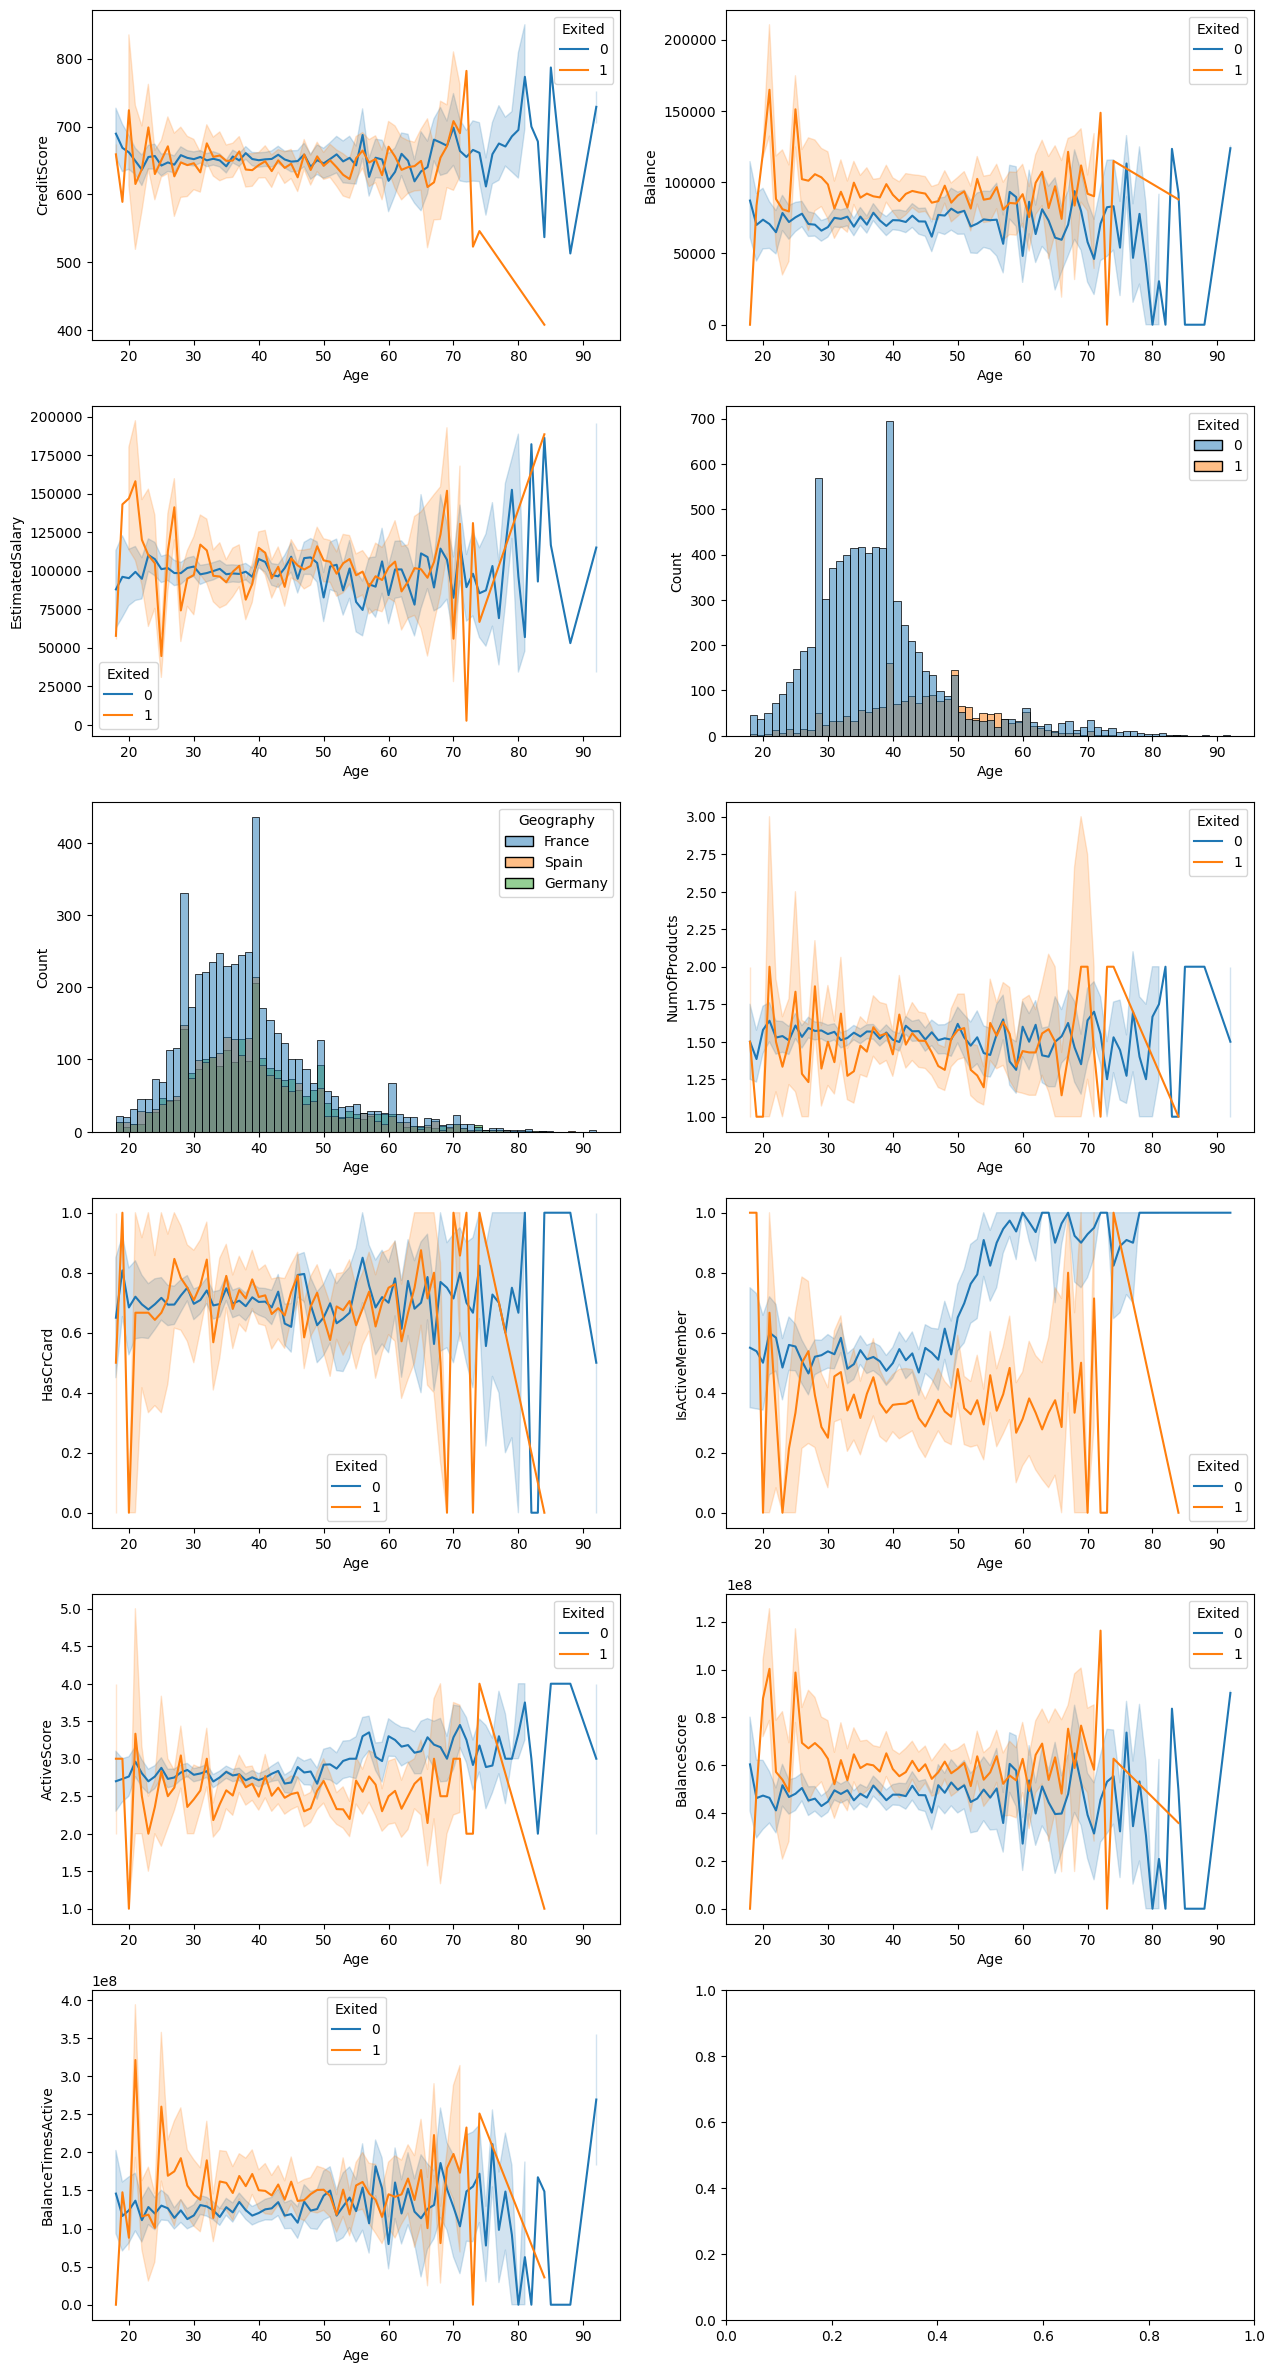

In [25]:
fig, axes = plt.subplots(6, 2, figsize=(15, 30))

sns.lineplot(data=df, x="Age", y="CreditScore", hue="Exited", ax=axes[0, 0])
sns.lineplot(data=df, x="Age", y="Balance", hue="Exited", ax=axes[0, 1])
sns.lineplot(data=df, x="Age", y="EstimatedSalary", hue="Exited", ax=axes[1, 0])
sns.histplot(data=df, x="Age", hue="Exited", ax=axes[1, 1])

sns.histplot(data=df, x="Age", hue="Geography", ax=axes[2, 0])
sns.lineplot(data=df, x="Age", y="NumOfProducts", hue="Exited", ax=axes[2, 1])
sns.lineplot(data=df, x="Age", y="HasCrCard", hue="Exited", ax=axes[3, 0])
sns.lineplot(data=df, x="Age", y="IsActiveMember", hue="Exited", ax=axes[3, 1])

df["ActiveScore"] = df["IsActiveMember"] + df["HasCrCard"] + df["NumOfProducts"]
sns.lineplot(data=df, x="Age", y="ActiveScore", hue="Exited", ax=axes[4, 0])

df["BalanceScore"] = df["Balance"] * df["CreditScore"]
sns.lineplot(data=df, x="Age", y="BalanceScore", hue="Exited", ax=axes[4, 1])

df["BalanceTimesActive"] = df["BalanceScore"] * df["ActiveScore"]
sns.lineplot(data=df, x="Age", y="BalanceTimesActive", hue="Exited", ax=axes[5, 0])

In [33]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'ActiveScore', 'BalanceTimesActive']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = df[features], df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [50]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
cmatrix = confusion_matrix(y_test, y_pred)

cmatrix

array([[1623,    0],
       [ 377,    0]])

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=1100, learning_rate=0.5, max_depth=1, random_state=0)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=1100,
                           random_state=0)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = gbc.predict(X_test)
print(set(y_pred))

score = accuracy_score(y_test, y_pred)
cmatrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {score}")
print(f"Precision: {cmatrix[0][0]/sum(cmatrix[0])}")
print(f"Recall: {cmatrix[0][0]/sum(cmatrix[:,0])}")
cmatrix

{np.int64(0), np.int64(1)}
Accuracy: 0.861
Precision: 0.9531731361675909
Recall: 0.884505431675243


array([[1547,   76],
       [ 202,  175]])